<a href="https://www.kaggle.com/code/wonduk/explained-tensorflow-cnn-digit-classification?scriptVersionId=159639855" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: #8F4635; font-family: Copperplate; color: white; padding: 14px; line-height: 1;border-radius:20px">Explained🔥 Digit Classification with Tensorflow</div>

![image](https://storage.googleapis.com/kaggle-competitions/kaggle/3004/logos/header.png?t=2018-11-14-20-12-43)

<h2 style="text-align: left;background-color: #8A8B6F; font-family: Copperplate; color: white; padding: 14px; line-height: 1; border-radius:10px">Competition Description</h2>

<h4>
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision.<br><br>
Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.<br><br>
As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.<br><br>
    <mark>Our goal</mark> is to correctly <u>identify digits from a dataset of tens of thousands of handwritten images.</u><br><br>
</h4>

<h2 style="text-align: left;background-color: #8A8B6F; font-family:Copperplate; color: white; padding: 14px; line-height: 1; border-radius:10px"> About Dataset</h2>

<h4>The data files train.csv and test.csv contain <b style='color:gray'>gray-scale images</b> of hand-drawn digits, from zero through nine.<br><br>
Each image is <mark>28 pixels</mark> in height and <mark>28 pixels</mark> in width, for a total of <mark>784 pixels</mark> in total.<br><br>
The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user.<br><br>
The rest of the columns contain the pixel-values of the associated image.<br><br>
The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.<br><br>
</h4>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h2 style="text-align: left;background-color: #8A8B6F; font-family:Copperplate; color: white; padding: 14px; line-height: 1; border-radius:10px"> Table of Contents</h2>  

<h3 style = 'font-family: Times New Roman'>
    
   * [1. Import Necessary Libraries](#1)
    
   * [2. Explore Datasets: Distribution of Labels, Shape of Images](#2)
    
   * [3. Preprocessing: Using ImageDataGenerator](#3)
    
   * [4. Modeling: CNN](#4)
    
   * [5. Model Evaluation](#5)
    
   * [6. Submit to Competition](#5)
    </h3>

# <div style="text-align: center; background-color:#6d5b5b; font-family:Copperplate; color: white; padding: 14px; line-height: 1;border-radius:10px"> 1. Import Necessary Libraries</div>

<h4> To begin with, import necessary libraries shown as below: </h4>

In [1]:
# for dataframe
import pandas as pd 
import numpy as np

# for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline 

# for preprocessing
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

# tensorflow

import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras_preprocessing.image import ImageDataGenerator

<h4> Read 3 datasets: 'train.csv', 'test.csv', 'sample_submission'</h4>

In [2]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
test_df = pd.read_csv('../input/digit-recognizer/test.csv')
sample_submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')

print('Shape of Train Dataset',train_df.shape)
print('Shape of Test Dataset',test_df.shape)

Shape of Train Dataset (42000, 785)
Shape of Test Dataset (28000, 784)


In [3]:
# to see last two rows of train dataset
train_df.tail(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# to see last two rows of test dataset
test_df.tail(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# <div style="text-align: center; background-color:#6d5b5b; font-family:Copperplate; color: white; padding: 14px; line-height: 1;border-radius:10px"> 2. Explore Datasets</div>

<h4>Here, we'll explore (1) Distribution of labels; (2) What does images in the dataset look like</h4>

In [5]:
# define barplot function
def plotly_bar(series, title, x_title, y_title):
    fig = px.bar(x = series.index.astype(str), 
                 y = series.values, 
                 color = series.index.astype(str), 
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 text = series.values,
                 template = "simple_white" ,
               title = title)
    
    fig.update_layout(
    font=dict(size=17,family="Times New Roman"))
    
    fig.update_layout(
    xaxis_title=x_title,
    yaxis_title=y_title,
    font=dict(size=17,family="Times New Roman")) 
    return fig

In [6]:
# label distribution (barplot)
train_label = train_df['label'].value_counts()

plotly_bar(train_label,'Distribution of Labels (Train Dataset)', 'labels','count')

<h4> As shown above, dataset has simillar distribution of each labels.</h4> 

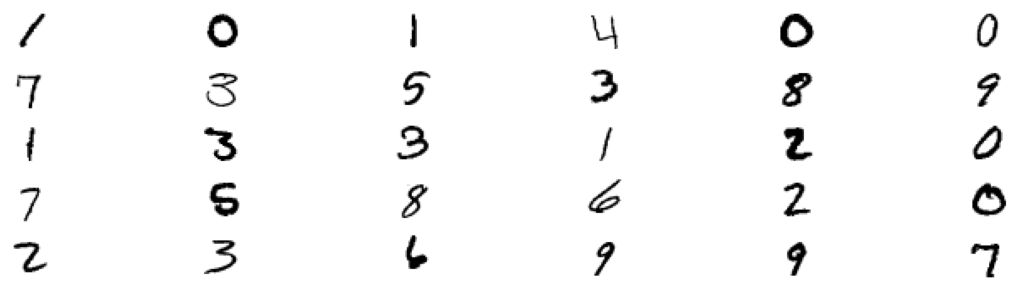

In [7]:
for_visual = train_df.drop('label',axis=1).values

# image visualization
plt.figure(figsize=(20,5))
for i in range(30):  
    plt.subplot(5, 6, i+1)
    plt.imshow(for_visual[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')

<h4> Plotted above are shape of images in the dataset. We can find that some are rotated.</h4>

# <div style="text-align: center; background-color:#6d5b5b; font-family:fantasy; color: white; padding: 14px; line-height: 1;border-radius:10px"> 3. Preprocessing </div>

<h4>
As mentioned above, each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.<br><br>
    Thus, we'll <mark>reshape dataset</mark> in to a form of 3D vector(28,28,1), here, 1 stands for RGB color<br><br>
    Next, use 'to_categorical' function to <mark>encode each label</mark>.
</h4>

In [8]:
# X stands for features
X = train_df.drop('label',axis=1)
# Reshape the form of original dataset
X = X.values.reshape(42000,28,28,1)

# y stands for labels (target value)
y = train_df['label']

y = to_categorical(y, num_classes = 10)

test_df = test_df.values.reshape(28000,28,28,1)

<h4>To evaluate our model, <mark>split train dataset</mark> into train set and validation set(ratio of 0.3).</h4>

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=116)

<h4>
    Here, use 'ImageDataGenerator' for <mark>image augmentation</mark>, which is a technique of applying different transformations to <br><br>
original images which results in multiple transformed copies of the same image.
</h4><br>

* rescale: rescale the image;
* rotation_range: value in degrees (0–180) within which to randomly rotate pictures;
* width_shift, height_shift: ranges within which to randomly translate pictures vertically or horizontally;
* shear_range: randomly applying shearing transformations;
* zoom_range: randomly zooming inside pictures;
* horizontal_flip: randomly flipping half of the images horizontally;
* fill_mode: used for filling in newly created pixels after rotation, width, height shift

In [10]:
# image generator
training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

# validation image generator
validation_datagen = ImageDataGenerator(rescale = 1./255)

<h4> Fit into train set and validation set</h4>

In [11]:
training_datagen.fit(X_train)

validation_datagen.fit(X_val)

<h4> <mark>Flow</mark> used below is a fuction to take data and label arrays, generates batches of augmented data.<br><br>
    <mark>batch_size</mark> stands for the number of samples that will be propagated through the network. Here we set <u>batch size as 128</u></h4>

In [12]:
training_datagen = training_datagen.flow(X_train, y_train, batch_size=128)
validation_datagen = validation_datagen.flow(X_val, y_val, batch_size = 128)

# <div style="text-align: center; background-color:#6d5b5b; font-family:fantasy; color: white; padding: 14px; line-height: 1;border-radius:10px"> 4. Modeling </div>

<h4>Here, we'll define sequential model using tensorflow keras.<br><br>
    <mark>tf.keras.layers.Conv2D</mark>: 2D convolution layer, creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.<br><br>
    <mark>tf.keras.layers.MaxPool2D</mark>: Max pooling operation for 2D spatial data<br><br>
    <mark>tf.keras.layers.Dropout</mark>: Applies Dropout to the input, which is usually used for avoid 'overfitting'<br><br>
    <mark>tf.keras.layers.Flatten</mark>: Flattens the input. Does not affect the batch size.
</h4>

In [13]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
# model.add(tf.keras.layers.Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64,kernel_size=(3, 3), activation='relu'))

model.add(tf.keras.layers.Conv2D(128,kernel_size=(3, 3), activation='relu'))

model.add(tf.keras.layers.Conv2D(256,kernel_size=(3, 3), activation='relu'))

model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 256)         0

<h4><mark>EarlyStopping</mark> is used for stop training when a monitored metric has stopped improving.</h4><br>

* patience: Number of epochs with <b>no improvement</b> after which training will be stopped;
* min_delta: <b>Minimum change</b> in the monitored quantity to qualify as an improvement;
* verbose:  Mode 0 is silent, and mode <b>1 displays messages</b> when the callback takes an action;
* restore_best_weigths: Whether to restore model weights from the epoch with <b>the best value</b> of the monitored quantity or not.

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 10,
                                                  min_delta = 0.0001,
                                                  verbose = 1,
                                                  monitor = 'val_loss',
                                                  mode = 'auto',
                                                  restore_best_weights = True)

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<h4>All things have been prepared, fit training_datagen into model.</h4><br>

In [15]:
history = model.fit(training_datagen, 
                    validation_data = validation_datagen, 
                    epochs=50, 
                    verbose = 1, 
                    validation_steps=3,
                    callbacks=[early_stopping])

Epoch 1/50
230/230 [==============================] - 17s 43ms/step - loss: 0.8278 - accuracy: 0.7191 - val_loss: 0.2875 - val_accuracy: 0.9010
Epoch 2/50
230/230 [==============================] - 9s 41ms/step - loss: 0.3175 - accuracy: 0.8996 - val_loss: 0.1028 - val_accuracy: 0.9740
Epoch 3/50
230/230 [==============================] - 10s 43ms/step - loss: 0.2075 - accuracy: 0.9351 - val_loss: 0.1388 - val_accuracy: 0.9609
Epoch 4/50
230/230 [==============================] - 10s 43ms/step - loss: 0.1603 - accuracy: 0.9497 - val_loss: 0.0861 - val_accuracy: 0.9661
Epoch 5/50
230/230 [==============================] - 9s 41ms/step - loss: 0.1425 - accuracy: 0.9544 - val_loss: 0.0416 - val_accuracy: 0.9870
Epoch 6/50
230/230 [==============================] - 10s 42ms/step - loss: 0.1254 - accuracy: 0.9605 - val_loss: 0.0559 - val_accuracy: 0.9792
Epoch 7/50
230/230 [==============================] - 10s 41ms/step - loss: 0.1168 - accuracy: 0.9635 - val_loss: 0.0968 - val_accuracy: 0

# <div style="text-align: center; background-color:#6d5b5b; font-family:fantasy; color: white; padding: 14px; line-height: 1;border-radius:10px"> 5. Model Evaluation </div>

<h4>We can compare <mark>accuracy and loss scores</mark> of train & validation dataset via graph below, to see whether model has results in overfitting: </h4>

In [16]:
epoch = history.epoch

color = ['#67001f','#b2182b','#4393c3','#2166ac']

fig1 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['accuracy'],line_color=color[0],name='1.train_accuracy score'),
    
    go.Line(x = epoch, y = history.history['val_accuracy'],line_color=color[3],name='2.val_accuracy score')
])

fig2 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['loss'],line_color = color[1],name='3.train_loss'),
    
    go.Line(x = epoch, y = history.history['val_loss'], line_color = color[2],name='4.val_loss')
])

figures = [fig1,fig2]
title = ['Accuracy & Validation Accuracy Score','Loss & Validation Loss Score']
fig = make_subplots(cols=len(figures),
                   subplot_titles=(title[0], title[1])) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i+1)
        
fig.update_xaxes(title_text="epochs", row=1, col=1)
fig.update_xaxes(title_text="epochs", row=1, col=2)

fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.update_layout(template = "simple_white", title = 'Accuracy & LOSS',
                 font = dict(size=17, family = 'Franklin Gothic'))

/opt/conda/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




# <div style="text-align: center; background-color:#6d5b5b; font-family:fantasy; color: white; padding: 14px; line-height: 1;border-radius:10px"> 6. Submit to Competition </div>

<h4>Cell below is to get predicted labels, and use 'np.argmax' to set array into <mark>1D</mark></h4>

In [17]:
result = model.predict(test_df)
result

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [18]:
classes = np.argmax(result,axis = 1) 
sample_submission['Label'] = classes

<h4> Use <u>'to_csv'</u> to save with csv file</h4>

In [19]:
sample_submission.to_csv('submission.csv',index=False)

<h4> Now, you can submit to the competition! You can revise the code in modeling section to improve accuracy score.</h4>

## <div style="text-align: center; background-color:#ECF0F1 ; font-family:Times New Roman; color: black; padding: 40px; line-height: 1;border-radius:40px"> 🙇Thanks For Watching ! -wonduk<br><br>Please upvote if you like this notebook !</div>